<a href="https://colab.research.google.com/github/space-32/Growthlink-Assignment/blob/main/SMS_spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing:

In [7]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')


# Check the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())




# Function to clean text
def clean_text(text):
    # Remove numbers, punctuation, and convert text to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Apply cleaning function to the messages
df['cleaned_message'] = df['v2'].apply(clean_text)


# Check the cleaned messages
print(df[['v2', 'cleaned_message']].head())




nltk.download('punkt_tab')

# Tokenize the cleaned messages
df['tokens'] = df['cleaned_message'].apply(word_tokenize)

print(df[['cleaned_message', 'tokens']].head())



# Using TF-IDF to convert text to numerical features
tfidf = TfidfVectorizer(max_features=3000)  # You can adjust max_features based on the dataset
X = tfidf.fit_transform(df['cleaned_message']).toarray()

print(X.shape)  # Check the shape of the feature matrix




# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['v1'], test_size=0.2, random_state=42)

# Check the shape of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64
                                                  v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't th

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                     cleaned_message  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in  a wkly comp to win fa cup final...   
3        u dun say so early hor u c already then say   
4  nah i dont think he goes to usf he lives aroun...   

                                              tokens  
0  [go, until, jurong, point, crazy, available, o...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, in, a, wkly, comp, to, win, fa, ...  
3  [u, dun, say, so, early, hor, u, c, already, t...  
4  [nah, i, dont, think, he, goes, to, usf, he, l...  
(5572, 3000)
(4457, 3000) (1115, 3000) (4457,) (1115,)


# Model Training

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9739910313901345
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[965   0]
 [ 29 121]]


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


Logistic Regression Accuracy: 0.9623318385650225
SVM Accuracy: 0.97847533632287


# Model Evaluation

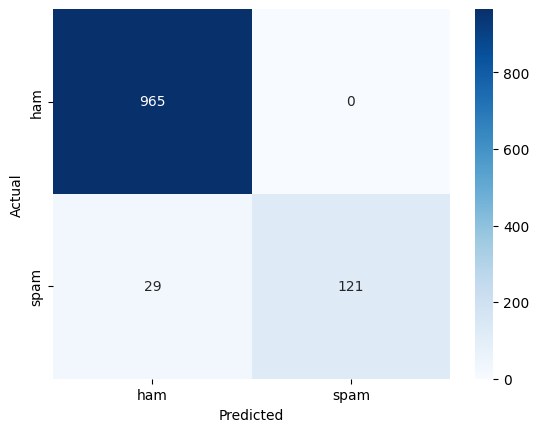

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Model Tuning

In [11]:
from sklearn.model_selection import GridSearchCV

# Example for Logistic Regression hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
grid = GridSearchCV(LogisticRegression(), param_grid, verbose=3, cv=3)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .................C=0.1, penalty=l2;, score=0.866 total time=   0.5s
[CV 2/3] END .................C=0.1, penalty=l2;, score=0.866 total time=   0.4s
[CV 3/3] END .................C=0.1, penalty=l2;, score=0.866 total time=   0.5s
[CV 1/3] END ...................C=1, penalty=l2;, score=0.962 total time=   0.7s
[CV 2/3] END ...................C=1, penalty=l2;, score=0.953 total time=   0.6s
[CV 3/3] END ...................C=1, penalty=l2;, score=0.947 total time=   0.7s
[CV 1/3] END ..................C=10, penalty=l2;, score=0.981 total time=   0.8s
[CV 2/3] END ..................C=10, penalty=l2;, score=0.976 total time=   0.8s
[CV 3/3] END ..................C=10, penalty=l2;, score=0.977 total time=   0.8s
Best parameters: {'C': 10, 'penalty': 'l2'}


Classification Report (SVM):
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



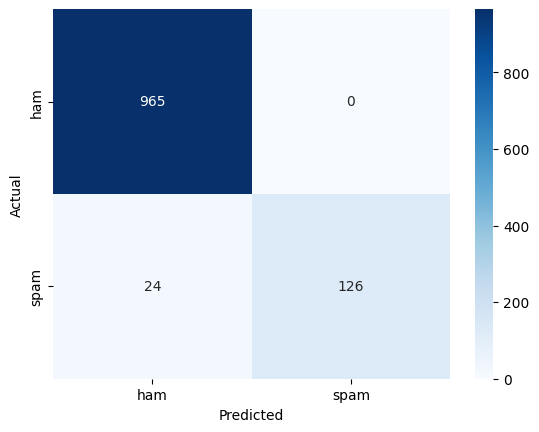

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the classification report
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# LSTM model

In [15]:
!pip install tensorflow keras


In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout





# Ensure all elements are strings and replace NaN or float values
X_train = [str(text) if isinstance(text, str) else "UNKNOWN" for text in X_train]
X_test = [str(text) if isinstance(text, str) else "UNKNOWN" for text in X_test]

# Preprocessing the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences so that they are of equal length
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)


# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert labels from 'spam'/'ham' to 1/0
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Ensure X_train_pad and X_test_pad are NumPy arrays with the correct dtype
X_train_pad = np.array(X_train_pad, dtype=np.int32)
X_test_pad = np.array(X_test_pad, dtype=np.int32)

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test_pad, y_test)
print(f"LSTM Model Accuracy: {accuracy[1]}")


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 37s 424ms/step - accuracy: 0.8189 - loss: 0.4491 - val_accuracy: 0.8655 - val_loss: 0.4155
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 418ms/step - accuracy: 0.8641 - loss: 0.4058 - val_accuracy: 0.8655 - val_loss: 0.3972
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 422ms/step - accuracy: 0.8640 - loss: 0.3996 - val_accuracy: 0.8655 - val_loss: 0.3965
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 410ms/step - accuracy: 0.8595 - loss: 0.4072 - val_accuracy: 0.8655 - val_loss: 0.3957
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.8644 - loss: 0.3977 - val_accuracy: 0.8655 - val_loss: 0.3980
Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 399ms/step - accuracy: 0.8670 - loss: 0.3940 - val_accuracy: 0.8655 - val_loss: 0.3964
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 397ms/step - accuracy: 0.8651 - loss: 0.3969 - val_accuracy: 0.8655 - val_loss: 0.3949
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 399ms/step - accuracy: 0.8656 - loss: 0.3958 - val_accuracy: 0.